In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_trafic = pd.read_csv("../CSVs/Open_Data_Website_Traffic.csv")
df_trafic.head()

,Date,Socrata Users,Socrata Sessions,Socrata Bounce Rate,Geohub Users,Geohub Sessions,Geohub Bounce Rate,Combined Users
0,08/07/2017,386,439,13.44,193.0,214.0,30.37,579.0
1,04/21/2017,354,422,16.11,115.0,133.0,39.85,469.0
2,02/26/2018,634,706,21.10,321.0,353.0,28.90,955.0
3,06/26/2016,136,148,0.00,44.0,54.0,51.85,180.0
4,06/28/2017,367,417,18.70,232.0,253.0,36.36,599.0


In [19]:
df_trafic['date_column'] = df_trafic.Date.astype("string")
df_trafic['year'] = df_trafic['date_column'].str[-4:]
df_trafic.year.fillna("0",  inplace=True)
df_trafic.drop(['date_column'], axis=1, inplace=True)
df_trafic.fillna(0, inplace=True)
df_trafic.tail()

,Date,Socrata Users,Socrata Sessions,Socrata Bounce Rate,Geohub Users,Geohub Sessions,Geohub Bounce Rate,Combined Users,year
1568,06/21/2018,552,603,31.01,256.0,276.0,25.00,808.0,2018
1569,06/22/2018,466,517,32.69,205.0,234.0,26.50,671.0,2018
1570,06/23/2018,182,209,34.93,87.0,103.0,24.27,269.0,2018
1571,06/24/2018,215,231,38.96,125.0,133.0,16.54,340.0,2018
1572,06/25/2018,670,772,30.96,271.0,306.0,23.86,941.0,2018


# Line chart

In [20]:
df_trafic_mean_by_year= pd.DataFrame()

def make_mean(col, group):
    df_trafic_mean_by_year[col] = df_trafic.groupby(group)[col].mean()

In [21]:
cols = df_trafic.iloc[:, 1:-1].columns

for c in cols:
    make_mean(c, 'year')
    
#df_trafic_mean_by_year.head()

<Axes: xlabel='year'>

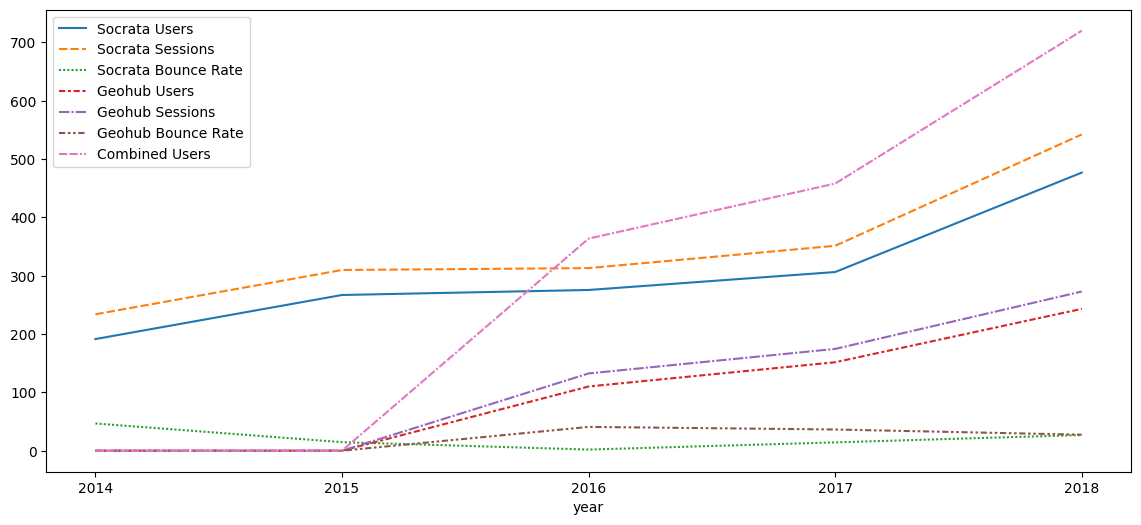

In [6]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df_trafic_mean_by_year)

# Bar chart

<Axes: ylabel='Socrata Users'>

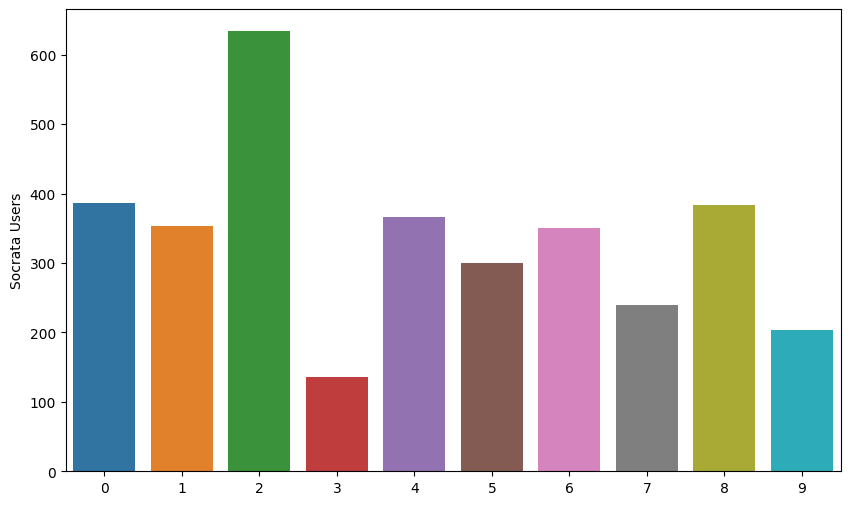

In [25]:
# df_trafic_mean_by_year.index = pd.to_numeric(df_trafic_mean_by_year.index,  errors='coerce')
# df_trafic_mean_by_year.head()

firsts_trafic = df_trafic.head(10)

plt.figure(figsize=(10,6))

sns.barplot(x=firsts_trafic.index, y=firsts_trafic['Socrata Users'])


# Heatmap

In [30]:
ign_data = pd.read_csv("../CSVs/ign_scores.csv", index_col="Platform")

<Axes: ylabel='Platform'>

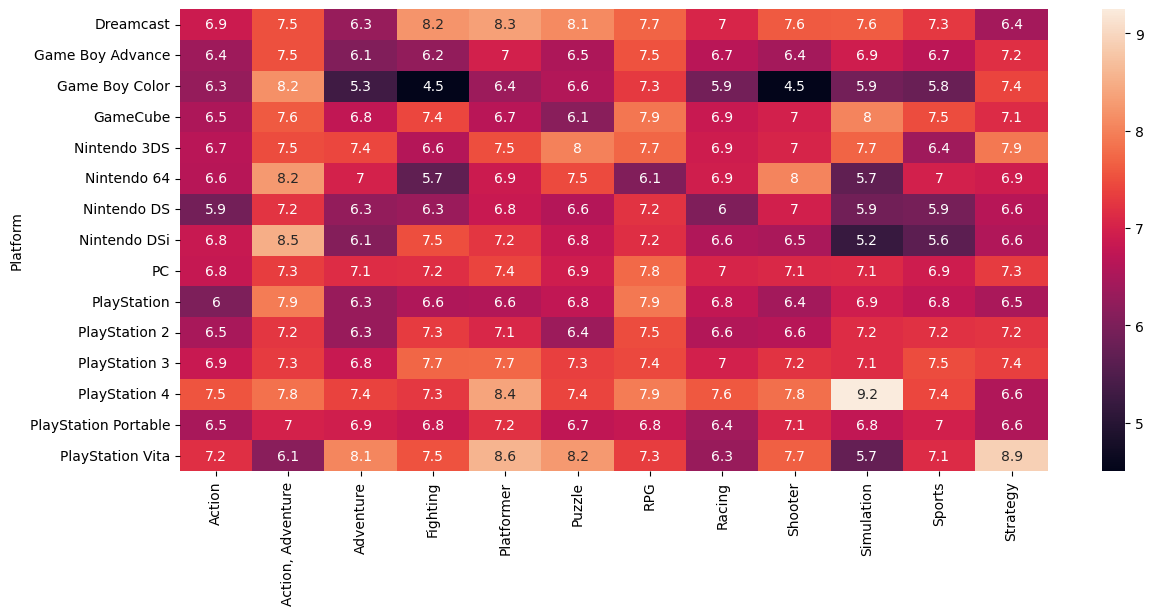

In [32]:
# columns_list = ['Socrata Users', 'Socrata Sessions', 'Socrata Bounce Rate', 'Geohub Users', 'Geohub Sessions', 'Geohub Bounce Rate','Combined Users']
# heat_meat_int = df_trafic_mean_by_year[list(columns_list)].astype(int)

plt.figure(figsize=(14,6))

sns.heatmap(data=ign_data.head(15), annot=True)